In [203]:
import pandas as panda
import matplotlib.pyplot as plot
data = panda.read_csv("datos.csv")

In [204]:
data['Course Title'].str.strip()
#eliminar espacios innecesarios


0                                       Fashion as Design
1                                  Modern American Poetry
2                               Pixel Art for Video Games
3         Distribución digital de la música independiente
4       The Blues: Understanding and Performing an Ame...
                              ...                        
9590                                     Power Onboarding
9591       Implementing Parent Feedback with Google Forms
9592                          "Making" Progress Teach-Out
9593    Use Microsoft PowerPoint to Create a Visual Sc...
9594    Créer du contenu pour les réseaux sociaux avec...
Name: Course Title, Length: 9595, dtype: object

In [205]:
data.drop_duplicates(inplace=True)

In [206]:
data['Rating'] = data['Rating'].fillna(0)

In [207]:
# Convertir la columna 'Rating' a tipo numérico para poder calcular el promedio
data['Rating'] = panda.to_numeric(data['Rating'], errors='coerce')

# Agrupar por título del curso y calcular el promedio de calificaciones
promedio_calificaciones = data.groupby('Course Title')['Rating'].mean()

promedio_calificaciones_dataframe = panda.DataFrame(promedio_calificaciones)

promedio_calificaciones_dataframe

,Rating
Course Title,
Assisting Public Sector Decision Makers With Policy Analysis,4.8
Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE,4.9
Build a social media presence for your business using Canva,4.7
Build social awareness content for Twitter with Canva,0.0
"Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado",4.9
...,...
"현대 로봇공학, 강좌 2: 로봇 기구학",0.0
"현대 로봇공학, 강좌 3: 로봇 동역학",0.0
"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",0.0


In [208]:
mayor_rating = promedio_calificaciones_dataframe.sort_values(by='Rating', ascending=False)
menor_rating = promedio_calificaciones_dataframe.sort_values(by='Rating', ascending=True)
mayor_rating

,Rating
Course Title,
Scrum Master Specialization,5.0
Compromiso del paciente: resultados clínicos satisfactorios Specialization,5.0
Road to the CISO – Culminating Project Course,5.0
Uncommon Sense Teaching: Teaching Online,5.0
Global Health Challenges and Governance Specialization,5.0
...,...
CAD/BIM技術與應用專項課程（CAD/BIM Specialization),0.0
Diversity and Belonging in Businesses and Organizations,0.0
Science of Firearm Injury Prevention Among Children & Teens,0.0


In [209]:
menor_rating

,Rating
Course Title,
"현대 로봇공학, 강좌 6: 캡스톤 프로젝트, 모바일 매니퓰레이션",0.0
The Basics of Rocket Science,0.0
Financiamiento en proyectos de infraestructura sostenible,0.0
The Basics of Libertarian Free Will,0.0
Find Your Calling: Career Transition Principles for Veterans,0.0
...,...
Networking Fundamentals,5.0
Road to the CISO – Culminating Project Course,5.0
Rapid Prototyping and Tooling Specialization,5.0


In [210]:
# Filtrar los cursos con horario flexible
cursos_horario_flexible = data[data['Schedule'] == 'Flexible schedule']

# Contar el número de cursos con horario flexible
num_cursos_horario_flexible = len(cursos_horario_flexible)

# Calcular el porcentaje de cursos con horario flexible respecto al total
porcentaje = (num_cursos_horario_flexible / len(data)) * 100

# Redondear el resultado a dos decimales
porcentaje_redondeado = round(porcentaje, 2)

print("Porcentaje de cursos con horario flexible en relación con el total de cursos:", porcentaje_redondeado, "%")

Porcentaje de cursos con horario flexible en relación con el total de cursos: 92.63 %


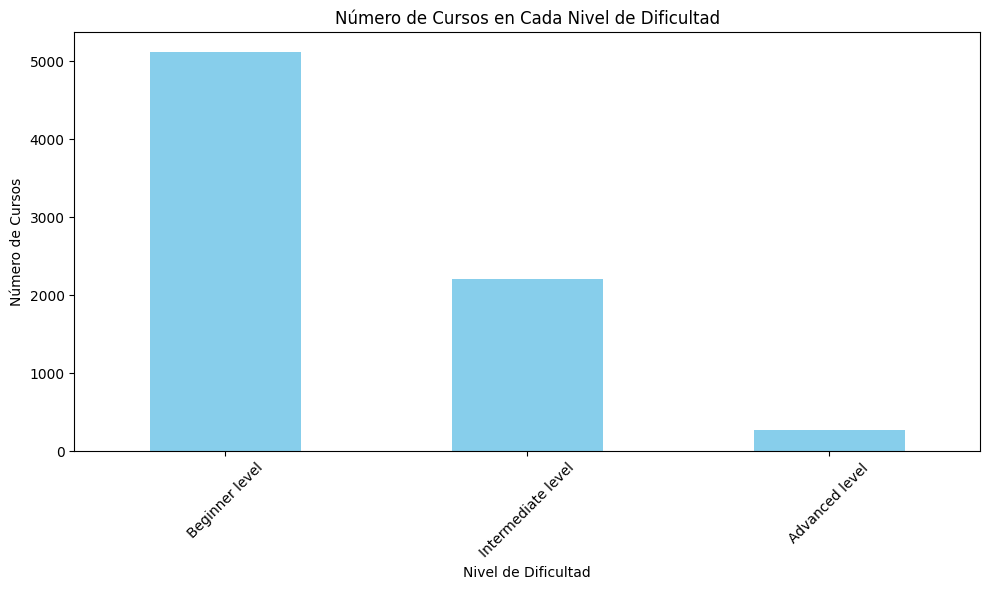

In [211]:
# Contar el número de cursos en cada nivel de dificultad
nivel_counts = data['Level'].value_counts()

# Crear la gráfica de barras
plot.figure(figsize=(10, 6))  # Tamaño de la gráfica
nivel_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras

# Agregar etiquetas y título
plot.xlabel('Nivel de Dificultad')
plot.ylabel('Número de Cursos')
plot.title('Número de Cursos en Cada Nivel de Dificultad')

# Mostrar la gráfica
plot.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad
plot.tight_layout()  # Ajustar diseño para evitar recorte de etiquetas
plot.show()

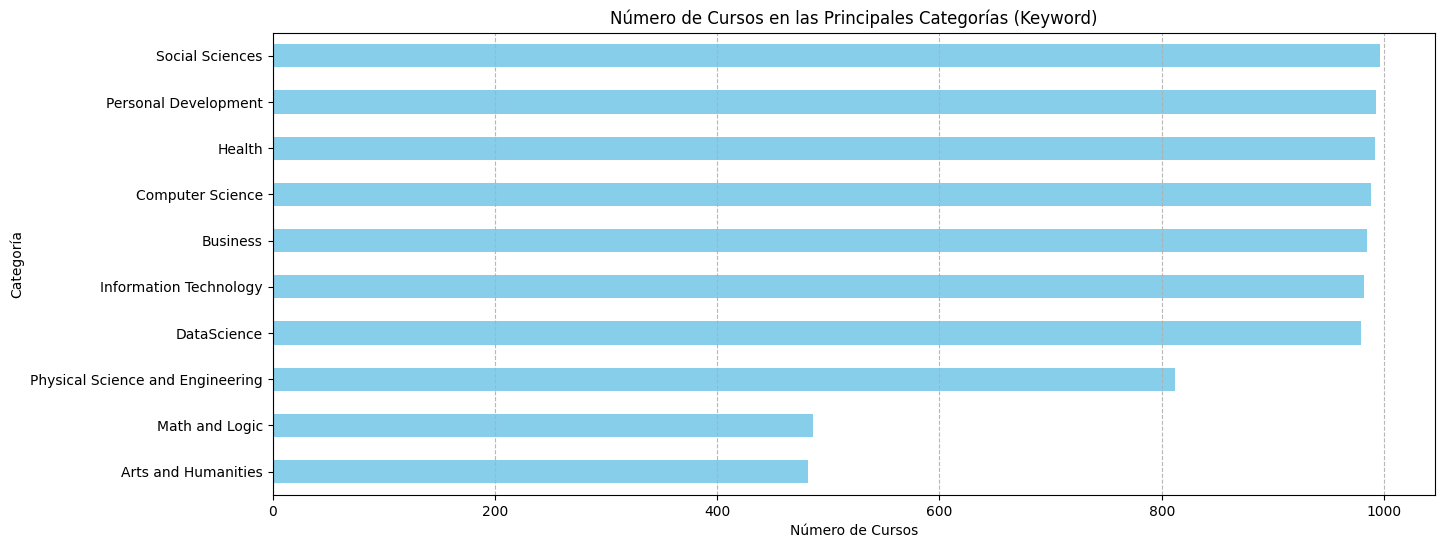

In [212]:
# Contar el número de cursos en cada categoría
categoria_counts = data['Keyword'].value_counts().head(20)  # Tomar las 10 principales categorías

# Crear la gráfica de barras horizontales
plot.figure(figsize=(15, 6))
categoria_counts.sort_values().plot(kind='barh', color='skyblue')
plot.title('Número de Cursos en las Principales Categorías (Keyword)')
plot.xlabel('Número de Cursos')
plot.ylabel('Categoría')
plot.grid(axis='x', linestyle='--', alpha=0.9)
plot.show()

In [213]:
# Función para convertir la duración a horas
import re

def convert_to_hours(duration):
    # Patrón para buscar el número de meses y horas por semana
    pattern1 = r"(\d+) months? at (\d+) hours? a week"
    
    # Buscar coincidencias en la cadena de duración
    match1 = re.search(pattern1, duration)
    total_hours = 0
    # Si hay coincidencias, calcular el total de horas
    if match1:
        months = int(match1.group(1))
        hours_per_week = int(match1.group(2))
        total_hours = months * 4 * hours_per_week  # 4 semanas por mes
        return total_hours
    
    pattern = r"(\d+)\s*(hour|hours|day|days|week|weeks|month|months)"
    matches = re.findall(pattern, duration)
    
    # Convertir cada coincidencia a horas
    for match in matches:
        value, unit = match
        value = int(value)
        
        if "hour" in unit:
            total_hours += value
        elif "day" in unit:
            total_hours += value * 24
        elif "week" in unit:
            total_hours += value * 24 * 7
        elif "month" in unit:
            total_hours += value * 24 * 30  # Tomando 30 días por mes
    
    return total_hours
# Convertir la columna "Duration" a strings
data["Duration"] = data["Duration"].astype(str)

# Aplicar la función a la columna de duración
data["Duration_hours"] = data["Duration"].apply(convert_to_hours)

# Mostrar el resultado
print(data[["Course Title", "Duration", "Duration_hours"]])

                                           Course Title  \
0                                     Fashion as Design   
1                                Modern American Poetry   
2                             Pixel Art for Video Games   
3       Distribución digital de la música independiente   
4     The Blues: Understanding and Performing an Ame...   
...                                                 ...   
8690  Architecting with Google Kubernetes Engine: Pr...   
8691  Computational Thinking for K-12 Educators: Nes...   
8692           Cómo combinar y analizar datos complejos   
8693  Architecting with Google Kubernetes Engine: Wo...   
8694                 Visualizing static networks with R   

                          Duration  Duration_hours  
0         20 hours (approximately)              20  
1     Approx. 34 hours to complete              34  
2          9 hours (approximately)               9  
3      Approx. 8 hours to complete               8  
4     Approx. 11 hours to 